# A proof of concept for active vision models: replacing items with fixations to explain results from visual search tasks
One way to understand cognitive processes that contribute to vision is to use visual search tasks in the laboratory. Classically, such tasks required the subject to fixate one point, not moving their eyes, while passively viewing a display of discrete items that can include a target and distractors. The subject is to report whether the target is present among the distractors. Often such experiments measure reaction time as a function of the number of items in the set, and the slope of this function is used as a measure of processing speed, e.g., milliseconds per item. An example of the stimuli shown in such experiments and typical results are shown in the figure below from [Wolfe Horowitz 2017](http://search.bwh.harvard.edu/new/pubs/FiveFactors_Wolfe-Horowitz_2017.pdf).  
<img align="center" src="../static/Fig-2-Wolfe-Horowitz-2017.png" width="600" />  
While such tasks have provided crucial insights and given rise to seminal models of selective visual attention, trying to translate them to everyday life becomes problematic. How do we use item-based analyses to understand search of natural scenes? It seems very unlikely that our brain constantly segments the entire scene before our eyes into discrete items. What, then, can take the place of items in visual search tasks, that will allow us to tractably relate behavior in controlled laboratory tasks to behavior in the real world? One possibility is **fixations**, the periods when the gaze is maintained in a relatively fixed location. In our everyday lives, we of course do not maintain our gaze fixated in just one location while sampling the visual environment, as subject are asked to do in classical visual search tasks. Instead, we constantly move our eyes to new regions of interest where we fixate. Many researchers recognize that the constraint of not moving the eyes is very artificial, and that in general models of vision must incorporate eye movements. [Findlay and Gilchrist (2003)](https://www.worldcat.org/search?qt=worldcat_org_all&q=active+vision+findlay) advocate such an approach, which they call **active vision** to differentate it from previous work, that used what they refer to as **passive vision** models.  
How do both types of models relate to laboratory visual search tasks? [Hulleman and Olivers (2017)](https://www.cambridge.org/core/journals/behavioral-and-brain-sciences/article/impending-demise-of-the-item-in-visual-search/263B1FA1A593ED41B5CF644784D94A46) wrote a commentary addressing the aforementioned issues with the item in visual search. They provide an excellent review of previous studies, including their own, that point to fixations as a good candidate to replace the item. They then propose a conceptual frameowrk that would use the **Functional Viewing Field** (FVF) to bridge the gap between fixation and item-based analyses. They define the FVF as "the area of the visual field around fixation from which a signal can be expected to be detected given sensory and attentional constraints". They then present simulations using a conveniently-computed form of FVF, as described in the next section. Their goal is not to carry out detailed simulations; they just want to provide a "proof of concept" that a fixation-based framework can address the issues that arise from item-based analyses. As they state, "the implementation \[in these simulations\] is formulated at a computational level (what are the outcomes) rather than an algorithmic level (what are the mechanisms; cf. Marr 1982)". The goal of the **aver** library is to provide a way to specify those mechanisms, using the Nengo neural simulator. Here, by replicating Hulleman and Olivers' model and results, I also hope to provide a proof of concept: that active vision models have the potential to provide alternate (and hopefully more correct) explanations for behavior seen in visual search tasks, and ultimately of vision in general.  

## The Functional Viewing Field
The crucial concept in the model that Hulleman and Olivers describe is the Functional Viewing Field (FVF). Again, they define the FVF as "the area of the visual field around fixation from which a signal can be expected to be detected given sensory and attentional constraints". These constraints include the acuity of the fovea, effects that result from the visible scene such as crowding and masking, and even attention-like effects such as a tendency to better detect items at the center of the visual field that remains even when controlling for other factors. Shown below is figure 1 from the article; the circles drawn with dotted lines represent their conception of how the FVF would change as a result of target discriminability. Each panel is an example of 'easy', 'medium' and 'hard' visual search displays from Young and Hulleman 2013, a study which investigated how eye movements relate to the difficulty of laboratory visual search tasks.
 
<img align="center" src="../static/hulleman-olivers-fig1.png" width="300" />   

Hulleman and Olivers compare results from this study to the output of their simulations using an FVF-based model. Below is a flowchart representing the model that Hulleman and Olivers propose.
<img align="center" src="../static/hulleman-olivers-fig2.png" width="400" />  
In this high-level model, the FVF is the only free parameter, and it specified as the number of items that can be processed in a single fixation. While it may seem odd to replace "items" with a parameter that represents "some number of items that can processed", this is just a convenience used in this high-level model that makes it possible to easily run simulations. Hulleman and Olivers propose that the FVF will vary with the difficulty of the visual search task, and a quick-and-dirty proxy for this is the number of items it can encompass. A more algorithm-focused model would specify mathematically how constraints like crowding effects, retinal acuity, and so on give rise to the FVF. 

For more about the details on the assumptions made by the model, please see [the full article](https://www.cambridge.org/core/journals/behavioral-and-brain-sciences/article/impending-demise-of-the-item-in-visual-search/263B1FA1A593ED41B5CF644784D94A46).

## Replication results

The model is implemented in the `fvf` package that is part of this repository.
It can be run from the command line like so:  
```console
$ fvf ./results
```
which will reproduce the results presented here, saving them in the specified results directory.  
The following sections present the main results of the simulations.

### Slopes of reaction times as function of display size
As described above, a long-standing approach to analyzing results from visual search tasks in the laboratory is to plot reaction time as a function of set size (AKA display size). Then by performing a linear regression on these points and finding a slope, one can get an estimate in units of "seconds per item". Hulleman and Olivers show how a their FVF-based approach allows for such an analysis.

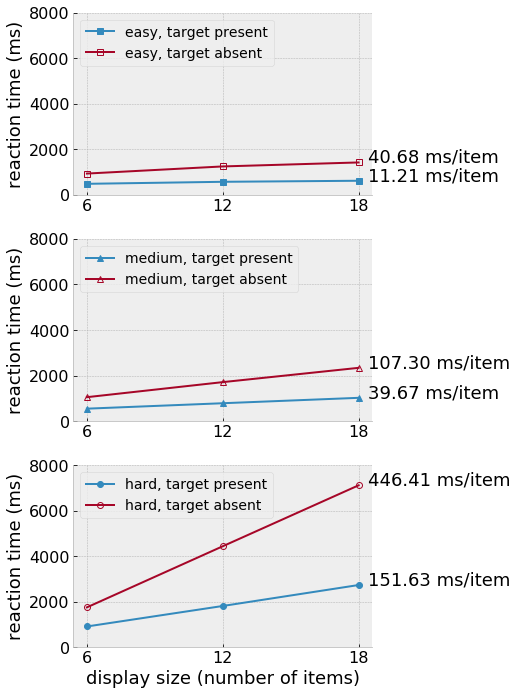

In [1]:
%matplotlib inline
import fvf

rt_results = fvf.munge.reaction_times('../../results/reaction_times.json',
                                      '../../results/responses.json')
fvf.plot.mean_reaction_times(rt_results.mean_RTs_all_display_sizes,
                             rt_results.mean_RTs_regress_results)

**Figure 1. Mean reaction times as a function of display size.** These plots suggest the FVF-based model can explain how slopes of reaction times vary with search difficulty. As shown, the FVF-based model produces typical reaction time vs. set size curves for a visual search task. For the easy-to-search displays, slopes were almost horizontal. For medium and hard-to-search displays, slopes are larger, and the "target absent" slope is much steeper. Note that only trials with correct responses were used to estimate reaction time, as in Young Hulleman 2013. Notice also that the current stopping rule (stop if more than 85% of the items in the display have been seen) leads to an overestimation of slopes for target absent search, especially for hard search tasks (bottom panel); Hulleman and Olivers state that a more sophisticated stopping rule would be needed by a fully fleshed-out model.

### Variability of reaction times

It is important for models of visual search to capture variability (Wolfe 2007). Serial item-based accounts predict that reaction times will always be less variable for target absent trials, because the subject on those trials will search through all items until stopping. On target present trials, the target could be any of the items visited, and this would lead to more variable reaction times. However in data from visual search tasks, the reaction times on target-absent trials usually have *higher* variability than those for target-present trials.

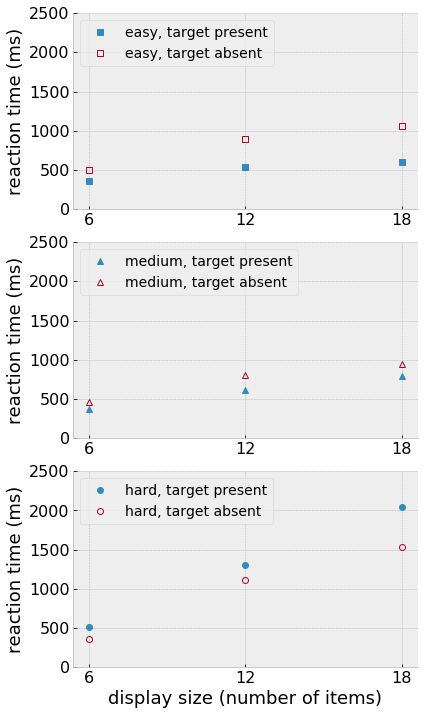

In [2]:
fvf.plot.standard_devs(rt_results.std_RTs_all_display_sizes)

**Figure 2. Standard deviation of reaction times as a function of display size.** These results show that the FVF-based model produces reaction times with variability similar to those seen in actual data. As shown in Hulleman Olivers 2017, it reproduces the relation of search difficulty to variability seen in Young Hulleman 2013. Those authors saw a reversal going from easy to hard search tasks: for easy tasks, the variability of reaction times is higher when the target is absent, and for hard tasks the variability is higher when the target is present. As Hulleman and Olivers write, "This suggests that \[the model\] succeeds in capturing a crucial aspect of the search process: namely that the size of the FVF increases as search becomes easier."

### Number of fixations
Plotting the number of fixations as a function of display size results in plots similar to those for reaction times. This should not be surprising, given that reaction time is a function of the number of fixations in this framework. More importanly, it illustrates how allowing for fixations in a model of visual search can explain behavioral data obtained with these tasks.

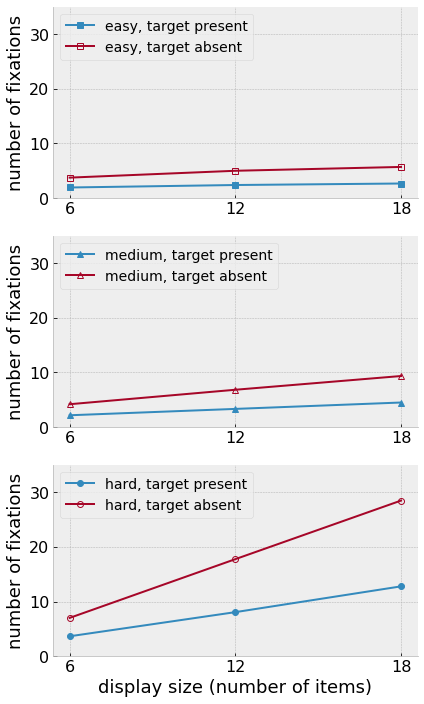

In [3]:
num_fix_results = fvf.munge.num_fixations('../../results/num_fixations.json')
fvf.plot.mean_num_fixations(num_fix_results.mean_num_fixations_all_display_sizes)

**Figure 3. Number of fixations as a function of display size.** These results also show how the FVF approach replicates key findings of visual search with eye movements. Specifically, notice that only in the 'hard' search condition does the number of fixations exceed the display size, as reported in Young Hulleman 2013.

### Distribution of reaction times
While the correct pattern of mean reaction times seen in visual search tasks can be produced by many models of visual search, producing the distribution of reaction times proves more challenging for some models (Wolfe 2010). As shown below, the FVF-based model does a good job of capturing several important aspects of these distributions.

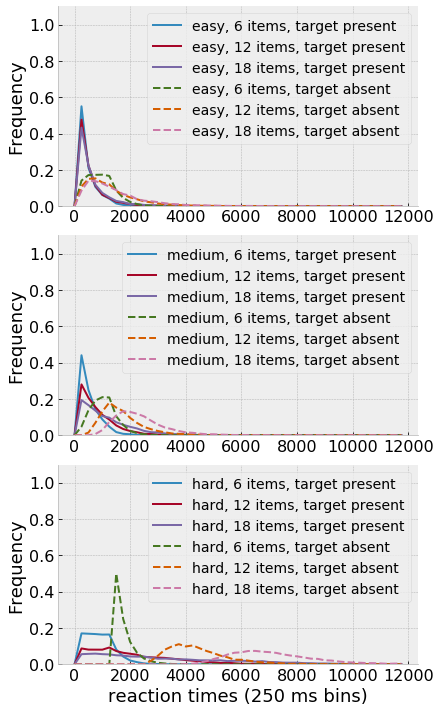

In [4]:
fvf.plot.reaction_times_distrib(rt_results.RTs_by_condition)

**Figure 4. Distribution of reaction times produced by an FVF-based model of visual search.** As shown, the model reproduces the distributions seen on target present trials: in the top panel, sharply peaked distributions for easy search tasks; in the middle panel, right-skewed distributions seen in medium search tasks; and in the bottom panel, long-tailed distributions for hard search tasks. As can be seen in the bottom panel, this version of an FVF-based model does not do as well with target-absent trials; the easy and medium task distributions produce a good fit, but the sharp peak in the bottom panel is probably an artifact of the stopping rule, and as Hulleman and Olivers recognized, this is another indication that a more sophisticated stopping rule is needed.